<a href="https://colab.research.google.com/github/harshyadav1508/Covid19_prediction/blob/main/lstm_gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pwd
!ls

/content
covid_19_data.csv  sample_data


In [6]:
dataset = pd.read_csv('/content/covid_19_data.csv')
dataset

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [7]:
print(f"Shape of Dataset: {dataset.shape}\n")
print(f"Type of Dataset:\n{dataset.dtypes}\n")
print(f"Check Dataset Null:\n{dataset.isnull().sum()}")


Shape of Dataset: (306429, 8)

Type of Dataset:
SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Check Dataset Null:
SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [8]:
dataset['ObservationDate'] = pd.to_datetime(dataset['ObservationDate'])


In [9]:
dataset_rnn = dataset.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [10]:
dataset_rnn

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,557.0,30.0,17.0
2020-01-23,1097.0,60.0,34.0
2020-01-24,941.0,39.0,26.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
2020-01-27,2927.0,65.0,82.0
2020-01-28,5578.0,108.0,131.0
2020-01-29,6165.0,127.0,133.0
2020-01-30,8235.0,145.0,171.0


In [11]:
dataset_rnn.shape

(494, 3)

#LSTM

In [18]:
training_set = dataset_rnn.iloc[:,0:1].values

#Date Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#Creating data structure with 45 timesteps
X_train = []
y_train = []
for i in range(45, 60):
    X_train.append(training_set_scaled[i-45:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train) , np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#Initialize the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

#Add first LSTM layer and Dropout regularisation
regressor.add(LSTM(units =50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding second layer
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding third layer
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding fourth layer
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mse')

#Training the model
#Taking a small batch size because the number of data points to train on is limited
regressor.fit(X_train, y_train, epochs = 200, batch_size = 5)

Epoch 1/200
3/3 [==============================] - 6s 14ms/step - loss: 2.0499e-04
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 1.2547e-04
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 3.7844e-05
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 6.0901e-05
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 1.0954e-05
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 3.6181e-05
Epoch 7/200
3/3 [==============================] - 0s 12ms/step - loss: 5.4681e-06
Epoch 8/200
3/3 [==============================] - 0s 12ms/step - loss: 1.9072e-05
Epoch 9/200
3/3 [==============================] - 0s 13ms/step - loss: 2.0739e-06
Epoch 10/200
3/3 [==============================] - 0s 12ms/step - loss: 2.5262e-06
Epoch 11/200
3/3 [==============================] - 0s 16ms/step - loss: 7.1855e-06
Epoch 12/200
3/3 [==============================] - 0s 13ms/step - loss: 7.2082e-06
E

In [19]:
#Prediction and visualization
real_confirmed_cases = dataset_rnn.iloc[57:77,0:1].values

X_test = []

for i in range(57,77):
    X_test.append(training_set_scaled[i-45:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases = sc.inverse_transform(predicted_confirmed_cases)

1/1 [==============================] - 1s 1s/step


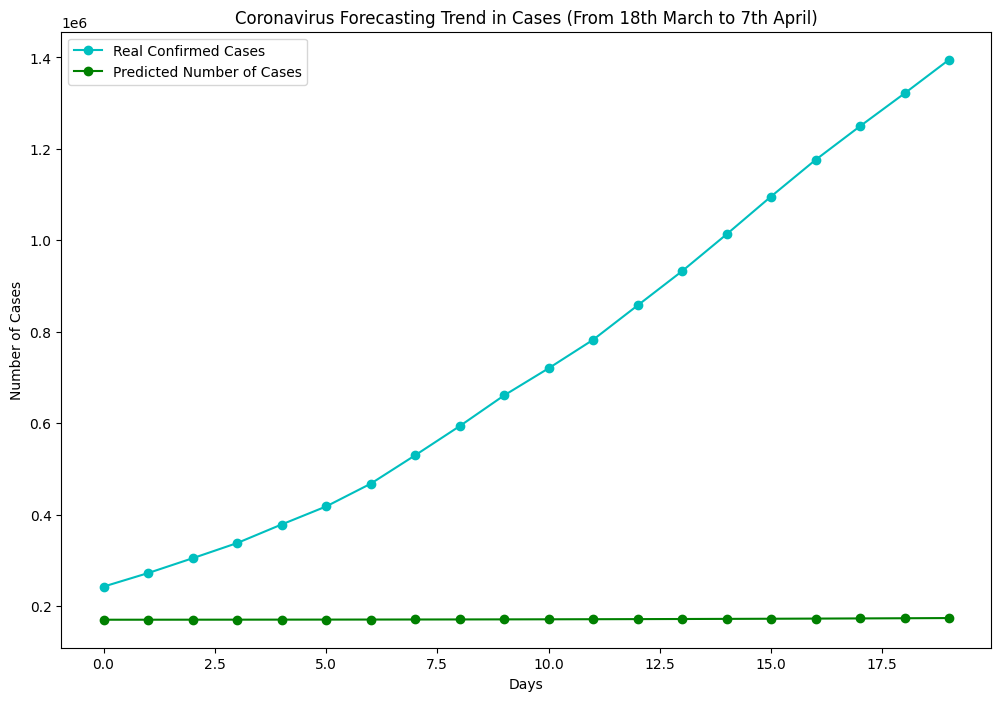

In [20]:
plt.figure(figsize = (12,8))
plt.plot(real_confirmed_cases, color='c',marker = 'o', label = 'Real Confirmed Cases')
plt.plot(predicted_confirmed_cases, color='g',marker = 'o', label = 'Predicted Number of Cases')
plt.title('Coronavirus Forecasting Trend in Cases (From 18th March to 7th April)')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [21]:
from keras.layers import GRU

regressor = Sequential()

#Add first GRU layer and Dropout regularisation
regressor.add(GRU(units =50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding second layer
regressor.add(GRU(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding third layer
regressor.add(GRU(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding fourth layer
regressor.add(GRU(units =50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mse')

#Training the model
#Taking a small batch size because the number of data points to train on is limited
regressor.fit(X_train, y_train, epochs = 200, batch_size = 5)

Epoch 1/200
3/3 [==============================] - 5s 13ms/step - loss: 4.2984e-04
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 4.0463e-04
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 7.8661e-05
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 1.6105e-04
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 4.6816e-05
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 6.5490e-05
Epoch 7/200
3/3 [==============================] - 0s 11ms/step - loss: 1.4837e-05
Epoch 8/200
3/3 [==============================] - 0s 12ms/step - loss: 3.9366e-05
Epoch 9/200
3/3 [==============================] - 0s 12ms/step - loss: 1.4497e-05
Epoch 10/200
3/3 [==============================] - 0s 12ms/step - loss: 2.5897e-05
Epoch 11/200
3/3 [==============================] - 0s 11ms/step - loss: 1.7382e-05
Epoch 12/200
3/3 [==============================] - 0s 11ms/step - loss: 1.3747e-05
E

In [22]:
#Prediction and visualization
real_confirmed_cases = dataset_rnn.iloc[57:77,0:1].values

X_test = []

for i in range(57,77):
    X_test.append(training_set_scaled[i-45:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases = sc.inverse_transform(predicted_confirmed_cases)

1/1 [==============================] - 1s 1s/step


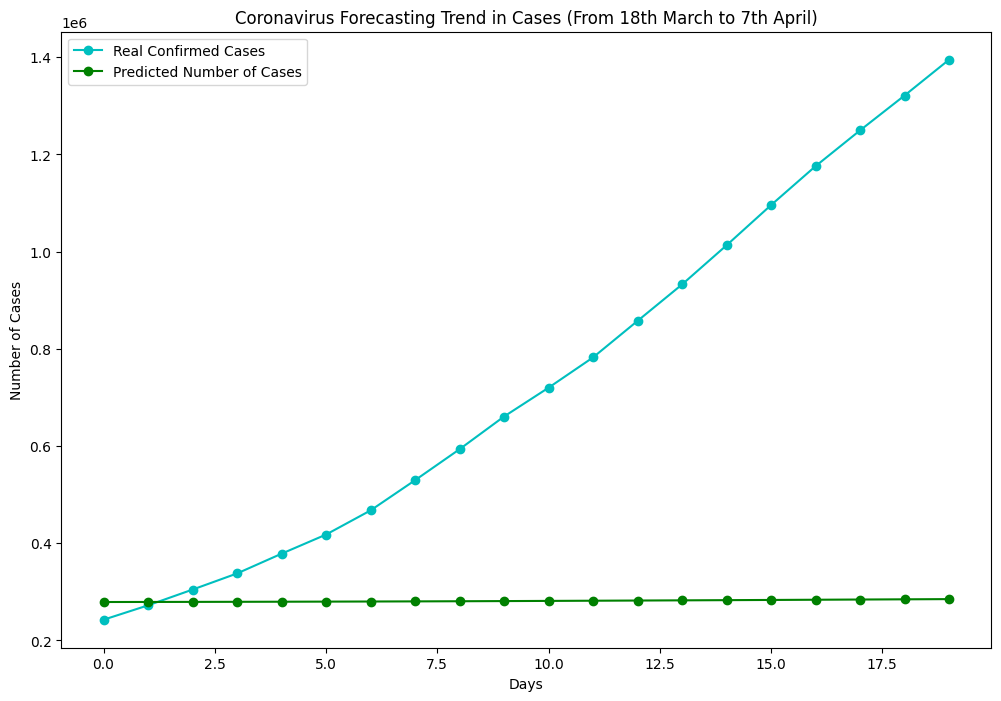

In [23]:
plt.figure(figsize = (12,8))
plt.plot(real_confirmed_cases, color='c',marker = 'o', label = 'Real Confirmed Cases')
plt.plot(predicted_confirmed_cases, color='g',marker = 'o', label = 'Predicted Number of Cases')
plt.title('Coronavirus Forecasting Trend in Cases (From 18th March to 7th April)')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()